In [1]:
import pandas as pd
import Technic as tc
from Technic import TSFM

In [2]:
# pip freeze > requirements.txt

## Internal Data Loader

In [3]:
df_internal_raw = pd.read_excel('fake_internal.xlsx')
df_internal_raw.head()

,Date,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
0,2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
1,2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2,2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
3,2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
4,2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [4]:
ID_config = {
    'in_sample_start':"2018-01-31",
    'in_sample_end':"2022-12-31",
    'full_sample_end':"2023-11-30",
    'scen_p0':"2022-12-31",
}
IDLoader = tc.PPNRInternalLoader(**ID_config)
IDLoader.load(df_internal_raw, date_col='Date')

In [5]:
IDLoader.internal_data.tail()

,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
Date,,,,,,
2023-07-31,2489.052561,0.033147,2518.590119,0.053016,2289.250500,0.035404
2023-08-31,2509.747182,0.046901,2582.117434,0.050611,2314.268164,0.011812
2023-09-30,2516.131131,0.050095,2612.826339,0.033226,2336.076344,0.024985
2023-10-31,2532.723351,0.051663,2649.181996,0.039805,2352.850746,0.035034
2023-11-30,2556.873350,0.051585,2683.722013,0.026095,2374.657724,0.030125


## Mev Loader

In [6]:
mev_load = {
    'model_mev_source': {'fake_scens.xlsx': 'base'},
    'scen_mevs_source': {
        'fake_scens.xlsx': {'base':'base', 'adv':'adv', 'sev':'sev'}
    } 
}
mev_ldr = tc.MEVLoader()
mev_ldr.load(
    source='fake_scens.xlsx',
    sheet='base'
)

mev_ldr.load_scens(
    source='fake_scens.xlsx',
    scens={
        'Base': 'base',
        'Adv': 'adv',
        'Sev': 'sev'
    },
    set_name='EWST2024'
)

In [7]:
mev_ldr.model_mev_qtr

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [8]:
mev_ldr.model_mev_mth

""


In [9]:
mev_ldr.scen_mev_qtr['EWST2024']['Base']

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [10]:
mev_ldr.mev_map

{'NGDP': {'type': 'level', 'description': 'Nominal GDP', 'category': None},
 'PSR': {'type': 'rate',
  'description': 'Personal Savings Rate',
  'category': None},
 'PDI': {'type': 'level',
  'description': 'Personal Disposable Income',
  'category': None},
 'UNRATE': {'type': 'rate',
  'description': 'Unemployment Rate',
  'category': None},
 'CPI': {'type': 'rate',
  'description': 'Consumer Price Index',
  'category': None}}

## Data Manager

In [11]:
dm_config = {
    'internal_loader': IDLoader,
    'mev_loader': mev_ldr,
}
dm = tc.DataManager(**dm_config)

In [12]:
dm.internal_in.head()

,Fixed_balance,Fixed_price,Redeemable_balance,Redeemable_price,VR_balance,VR_price
Date,,,,,,
2018-01-31,1525.766256,0.054260,808.925168,0.018648,1022.483571,0.045600
2018-02-28,1540.515474,0.046348,835.771506,0.034777,1041.792249,0.023520
2018-03-31,1566.467979,0.026517,863.370334,0.017302,1065.030692,0.025023
2018-04-30,1563.129764,0.022823,896.188563,0.036981,1092.645841,0.013759
2018-05-31,1583.883081,0.045697,908.819056,0.032661,1111.475074,0.033131


In [13]:
dm.model_mev

2000-01-31 00:00:00
2030-12-31 23:59:59.999999999


,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-01-31,100.318804,10040.982536,8049.558340,3.330651,3.019513,1,1
2000-02-29,100.174499,10031.057676,8047.990101,3.617300,3.188324,2,1
2000-03-31,99.986696,10025.669787,8044.831560,3.972049,3.032162,3,1
2000-04-30,99.870499,10010.113980,8044.698397,4.158715,3.475489,4,2
2000-05-31,99.716324,9999.486996,8043.029538,4.453719,3.695684,5,2
...,...,...,...,...,...,...,...
2030-08-31,104.751749,10548.539099,8319.502456,6.706667,3.635109,8,3
2030-09-30,104.791963,10515.955213,8304.163433,7.439487,3.792450,9,3
2030-10-31,104.927264,10498.638951,8296.025314,6.706280,4.773842,10,4
2030-11-30,105.015534,10477.234660,8285.630767,6.652411,5.439648,11,4


In [14]:
dm.scen_mevs['EWST2024']['Base']

2000-01-31 00:00:00
2030-12-31 23:59:59.999999999
2000-01-31 00:00:00
2030-12-31 23:59:59.999999999
2000-01-31 00:00:00
2030-12-31 23:59:59.999999999


,NGDP,PSR,PDI,UNRATE,CPI,M,Q
2000-01-31,100.318804,10040.982536,8049.558340,3.330651,3.019513,1,1
2000-02-29,100.174499,10031.057676,8047.990101,3.617300,3.188324,2,1
2000-03-31,99.986696,10025.669787,8044.831560,3.972049,3.032162,3,1
2000-04-30,99.870499,10010.113980,8044.698397,4.158715,3.475489,4,2
2000-05-31,99.716324,9999.486996,8043.029538,4.453719,3.695684,5,2
...,...,...,...,...,...,...,...
2030-08-31,104.751749,10548.539099,8319.502456,6.706667,3.635109,8,3
2030-09-30,104.791963,10515.955213,8304.163433,7.439487,3.792450,9,3
2030-10-31,104.927264,10498.638951,8296.025314,6.706280,4.773842,10,4
2030-11-30,105.015534,10477.234660,8285.630767,6.652411,5.439648,11,4


In [15]:
# Build Search Vars
var_lst = ['VR_price', 'NGDP', 'PDI']
df_dict = dm.build_search_vars(var_lst)
df_dict


/Users/kexinz8/Project_LEGO/Technic/data.py:985: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


{'VR_price':             VR_price
 Date                
 2018-01-31  0.045600
 2018-02-28  0.023520
 2018-03-31  0.025023
 2018-04-30  0.013759
 2018-05-31  0.033131
 ...              ...
 2023-07-31  0.035404
 2023-08-31  0.011812
 2023-09-30  0.024985
 2023-10-31  0.035034
 2023-11-30  0.030125
 
 [71 rows x 1 columns],
 'NGDP':                NGDP_LV  NGDP_MMGR
 2000-01-31  100.318804        NaN
 2000-02-29  100.174499  -0.001438
 2000-03-31   99.986696  -0.001875
 2000-04-30   99.870499  -0.001162
 2000-05-31   99.716324  -0.001544
 ...                ...        ...
 2030-08-31  104.751749   0.000148
 2030-09-30  104.791963   0.000384
 2030-10-31  104.927264   0.001291
 2030-11-30  105.015534   0.000841
 2030-12-31  105.117202   0.000968
 
 [372 rows x 2 columns],
 'PDI':                  PDI_LV  PDI_MMGR
 2000-01-31  8049.558340       NaN
 2000-02-29  8047.990101 -0.000195
 2000-03-31  8044.831560 -0.000392
 2000-04-30  8044.698397 -0.000017
 2000-05-31  8043.029538 -0.000207
 ...

In [16]:
dm.model_mev['NGDP']

2000-01-31    100.318804
2000-02-29    100.174499
2000-03-31     99.986696
2000-04-30     99.870499
2000-05-31     99.716324
                 ...    
2030-08-31    104.751749
2030-09-30    104.791963
2030-10-31    104.927264
2030-11-30    105.015534
2030-12-31    105.117202
Freq: M, Name: NGDP, Length: 372, dtype: float64

In [17]:
# Apply to MEVs
def new_features(df_mev, df_in):
    df_mev['NGDP-Price'] =  df_mev['NGDP'] - df_in['VR_price']
    df_mev['PDI-FixBal'] =  df_mev['PDI'] - df_in['Fixed_balance']

    return df_mev

dm.apply_to_mevs(new_features)

In [18]:
dm.model_mev.dropna()

,NGDP,PSR,PDI,UNRATE,CPI,M,Q,NGDP-Price,PDI-FixBal
2018-01-31,103.034573,10285.533647,8183.497577,5.449573,5.407189,1,1,102.988972,6657.731321
2018-02-28,103.056102,10315.862990,8190.504726,7.135554,6.681737,2,1,103.032582,6649.989253
2018-03-31,103.059326,10349.813364,8200.317697,8.354872,8.851075,3,1,103.034302,6633.849717
2018-04-30,102.957852,10333.453497,8200.630543,4.993112,8.801514,4,2,102.944093,6637.500780
2018-05-31,102.897198,10339.923683,8206.927881,3.978493,9.898527,5,2,102.864067,6623.044799
...,...,...,...,...,...,...,...,...,...
2023-07-31,103.810936,10325.209587,8228.939232,6.673598,4.089677,7,3,103.775532,5739.886671
2023-08-31,103.914797,10308.676255,8196.723690,6.249977,5.149732,8,3,103.902985,5686.976508
2023-09-30,103.884267,10328.244159,8171.517078,5.436425,6.390591,9,3,103.859282,5655.385947
2023-10-31,103.511451,10440.218371,8203.040136,4.254526,6.302858,10,4,103.476416,5670.316786


In [19]:
dm._mev_loader.scen_mev_qtr['EWST2024']['Base'].dropna()

nan,NGDP,PSR,PDI,UNRATE,CPI
2000-03-31,100.16,10032.57,8047.46,3.64,3.08
2000-06-30,99.74,9996.18,8044.02,4.42,3.96
2000-09-30,99.77,9940.38,8035.14,4.82,9.3
2000-12-31,99.54,10063.83,7958.35,6.23,9.12
2001-03-31,99.8,9925.75,8018.19,5.85,7.18
...,...,...,...,...,...
2029-12-31,105.11,10440.04,8241.36,6.99,5.95
2030-03-31,104.82,10487.64,8309.24,3.75,8.16
2030-06-30,104.71,10610.59,8355.29,4.15,4.67
2030-09-30,104.76,10546.66,8319.09,6.61,3.77


In [20]:
dm.scen_mevs['EWST2024']['Sev'].dropna()

,NGDP,PSR,PDI,UNRATE,CPI,M,Q,NGDP-Price,PDI-FixBal
2018-01-31,123.640543,9256.976931,9820.201430,4.903529,6.490894,1,1,123.594943,8294.435174
2018-02-28,123.667245,9284.273958,9828.608543,6.419835,8.012166,2,1,123.643726,8288.093069
2018-03-31,123.672211,9314.829111,9840.380028,7.516636,10.606940,3,1,123.647188,8273.912048
2018-04-30,123.549617,9300.101994,9840.750482,4.494156,10.557232,4,2,123.535857,8277.620718
2018-05-31,123.476810,9305.922990,9848.302372,3.581626,11.876097,5,2,123.443679,8264.419291
...,...,...,...,...,...,...,...,...,...
2023-07-31,124.579829,9292.692846,9874.727818,6.008540,4.904680,7,3,124.544425,7385.675257
2023-08-31,124.704441,9277.809700,9836.065866,5.626660,6.177638,8,3,124.692629,7326.318685
2023-09-30,124.665731,9295.417453,9805.816316,4.894800,7.667681,9,3,124.640746,7289.685184
2023-10-31,124.213058,9396.195710,9843.648496,3.835656,7.559315,10,4,124.178024,7310.925145


In [21]:
# Apply to Internal
print(dm.internal_data.head(3))
def new_features(df_in):
    df_in['VR_Bal-Price'] =  df_in['VR_balance'] - df_in['VR_price']
    df_in['Fixed_Bal-Price'] =  df_in['Fixed_balance'] - df_in['Fixed_price']

    return df_in

dm.apply_to_internal(new_features)
print(dm.internal_data.head(3))


            Fixed_balance  Fixed_price  Redeemable_balance  Redeemable_price  \
Date                                                                           
2018-01-31    1525.766256     0.054260          808.925168          0.018648   
2018-02-28    1540.515474     0.046348          835.771506          0.034777   
2018-03-31    1566.467979     0.026517          863.370334          0.017302   

             VR_balance  VR_price  
Date                               
2018-01-31  1022.483571  0.045600  
2018-02-28  1041.792249  0.023520  
2018-03-31  1065.030692  0.025023  
            Fixed_balance  Fixed_price  Redeemable_balance  Redeemable_price  \
Date                                                                           
2018-01-31    1525.766256     0.054260          808.925168          0.018648   
2018-02-28    1540.515474     0.046348          835.771506          0.034777   
2018-03-31    1566.467979     0.026517          863.370334          0.017302   

             VR_ba

/Users/kexinz8/Project_LEGO/Technic/data.py:1308: UserWarning: No scenario internal data found. Function only applied to main internal data. Load scenario data using load_scens() if you want to apply the function to scenarios as well.
  warnings.warn(


## Model Building

### CM

In [19]:
cm_config = {
    'model_id': 'cm1',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}
cm1 = tc.CM(**cm_config)

In [23]:
m_dum = tc.DumVar('M', categories=[2,3,4])
indep_vars = [m_dum, 'NGDP']
cm1.build(indep_vars)

In [24]:
cm1.model_in.testset.all_test_results

{'Fit Measures': R²        0.675494
 Adj R²    0.651893
 Name: Fit Measures, dtype: float64,
 'IS Error Measures': ME      505.298599
 MAE     139.733768
 RMSE    183.680547
 Name: IS Error Measures, dtype: float64,
 'OOS Error Measures': ME      778.116552
 MAE     340.389160
 RMSE    387.209325
 Name: OOS Error Measures, dtype: float64,
 'In-Sample R²': R²    0.675494
 Name: In-Sample R², dtype: float64,
 'Common Driver Significance':            P-value  Passed
 NGDP  1.263668e-13    True,
 "Group Driver F-Test M:2'3'4":               F-statistic  P-value  Passed
 Joint F Test     2.447408   0.0734    True,
 'Multicollinearity':                VIF
 Variable          
 NGDP      1.331018
 M:2       1.122161
 M:3       1.200633
 M:4       1.135271,
 'Residual Stationarity':        Statistic   P-value  Passed
 Test                              
 ADF    -1.560728  0.503285   False
 PP     -1.973907  0.298130   False
 KPSS    0.694610  0.014035   False
 ZA           NaN       NaN   False


=== In-Sample Performance ===
      r2   adj_r2         me        mae       rmse
0.675494 0.651893 505.298599 139.733768 183.680547

=== Model Parameters ===
Variable        Coef Pvalue       VIF        Std
   const -98454.2082  0.000 146086.51 10219.7241
    NGDP    967.6365  0.000      1.33    99.0149
     M:2    193.5453  0.041      1.12    92.5730
     M:3    309.5975  0.015      1.20   123.1140
     M:4    250.1751  0.021      1.14   104.9338


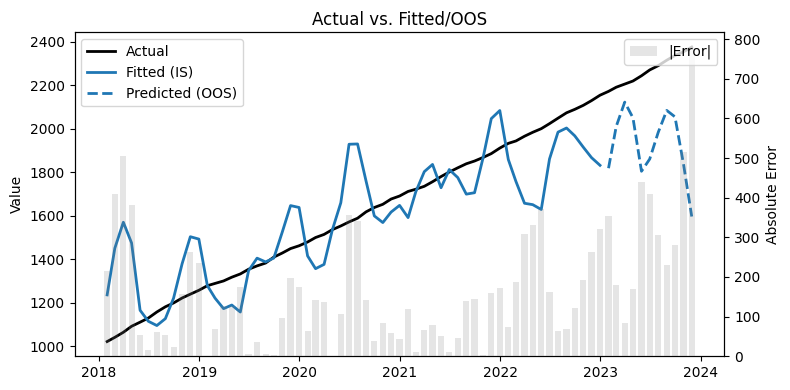


=== Model Testing ===
--- Fit Measures ---
R²        0.675494
Adj R²    0.651893

--- IS Error Measures ---
ME      505.298599
MAE     139.733768
RMSE    183.680547

--- OOS Error Measures ---
ME      778.116552
MAE     340.389160
RMSE    387.209325

--- In-Sample R² ---
R²    0.675494

--- Common Driver Significance ---
           P-value  Passed
NGDP  1.263668e-13    True

--- Group Driver F-Test M:2'3'4 ---
              F-statistic  P-value  Passed
Joint F Test     2.447408   0.0734    True

--- Multicollinearity ---
               VIF
Variable          
NGDP      1.331018
M:2       1.122161
M:3       1.200633
M:4       1.135271

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -1.560728  0.503285   False
PP     -1.973907  0.298130   False
KPSS    0.694610  0.014035   False
ZA           NaN       NaN   False
DFGLS  -0.291047  0.585190   False
RUR     1.678293  0.900000    True

--- Residual Normality ---
      Statistic   P

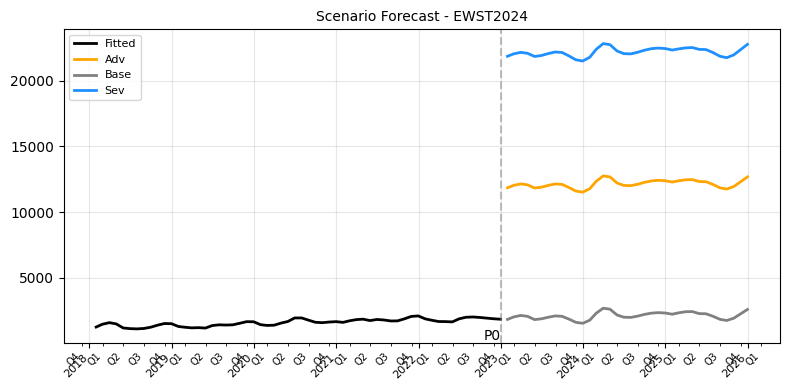

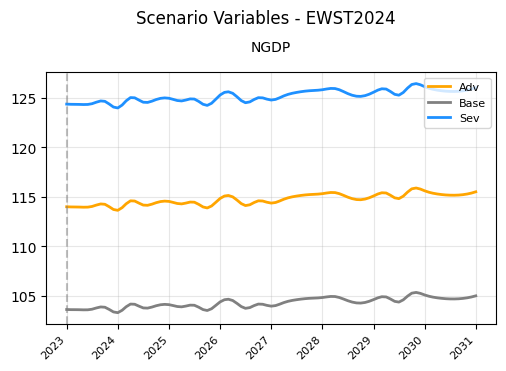

In [25]:
cm1.show_report(show_tests=True, show_scens=True)

In [26]:
cm_config = {
    'model_id': 'cm2',
    'target': 'VR_balance',
    'model_cls': tc.OLS
}
cm2 = tc.CM(**cm_config)

m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP', 'CPI', 'PSR']
cm2.build(indep_vars, data_manager=dm)#, outlier_idx=['2018-04-30', '2018-05-31'])

=== In-Sample Performance ===
      r2   adj_r2         me        mae       rmse
0.756048 0.680152 491.191616 120.103691 159.259015

=== Model Parameters ===
Variable        Coef Pvalue       VIF        Std
   const -1.0507e+05  0.000 206754.13 10361.5239
    NGDP    934.1116  0.000      1.54    99.9171
     CPI    -24.1326  0.070      1.44    12.9989
     PSR      0.9913  0.122      1.46     0.6298
     M:2    185.9076  0.009      1.87    68.4738
     M:3    306.4770  0.006      1.93   106.2067
     M:4    251.4697  0.013      1.88    97.1304
     M:5     93.7870  0.223      1.84    75.9270
     M:6    -22.8894  0.772      1.88    78.4695
     M:7    -16.7711  0.817      1.90    72.1364
     M:8     55.6024  0.393      1.89    64.4613
     M:9     88.7517  0.259      1.89    77.6270
    M:10     22.7783  0.809      1.91    93.7110
    M:11    -59.9413  0.578      1.95   106.8578
    M:12    -57.5663  0.580      1.96   103.3827


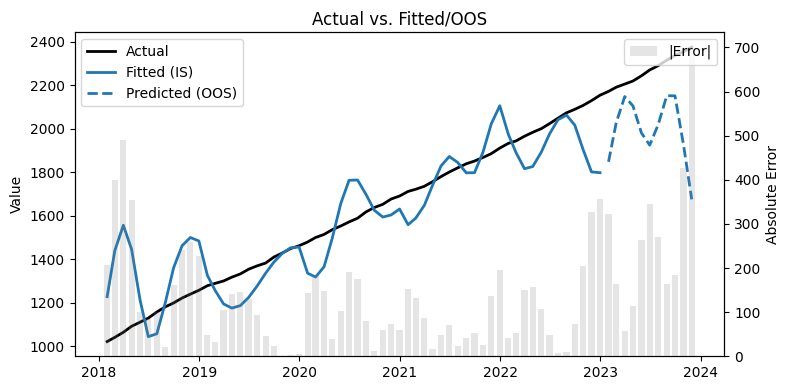


=== Model Testing ===
--- Fit Measures ---
R²        0.756048
Adj R²    0.680152

--- IS Error Measures ---
ME      491.191616
MAE     120.103691
RMSE    159.259015

--- OOS Error Measures ---
ME      699.212192
MAE     273.689748
RMSE    322.041926

--- In-Sample R² ---
R²    0.756048

--- Common Driver Significance ---
           P-value  Passed
NGDP  4.103667e-12    True
CPI   6.993462e-02    True
PSR   1.224739e-01   False

--- Group Driver F-Test M:2'3'4'5'6'7'8'9'10'11'12 ---
              F-statistic   P-value  Passed
Joint F Test     1.440191  0.188699   False

--- Multicollinearity ---
               VIF
Variable          
NGDP      1.542173
CPI       1.440777
PSR       1.459822
M:2       1.871108
M:3       1.925713
M:4       1.877397
M:5       1.839475
M:6       1.879077
M:7       1.902446
M:8       1.892991
M:9       1.887199
M:10      1.908031
M:11      1.953553
M:12      1.956246

--- Residual Stationarity ---
       Statistic       P-value  Passed
Test                   

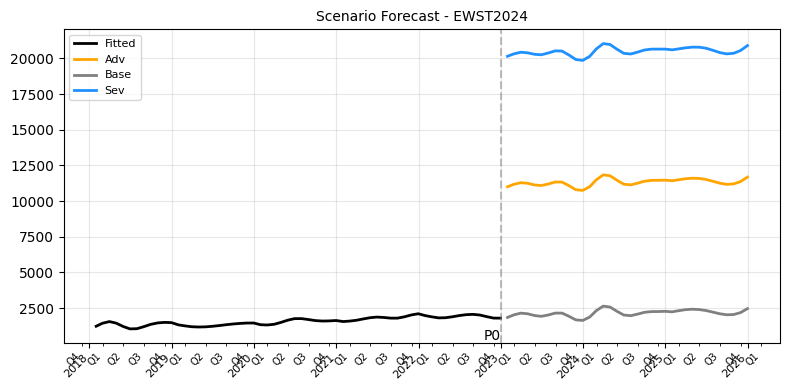

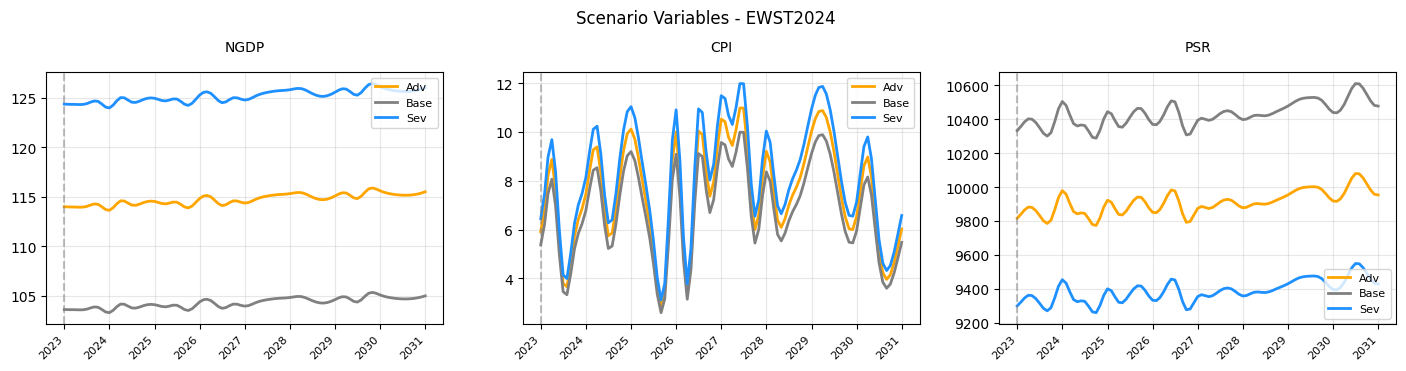

In [27]:
cm2.show_report(show_tests=True, show_scens=True)

### Segment

In [22]:
seg_config = {
    'segment_id': 'VR',
    'target': 'VR_balance',
    'data_manager': dm,
    'model_cls': tc.OLS
}

seg1 = tc.Segment(**seg_config)

In [23]:
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
tsfm_specs_map = dm.build_tsfm_specs(vars_list, max_lag=1, max_periods=2)

/Users/kexinz8/Project_LEGO/Technic/data.py:985: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


In [24]:
tsfm_specs_map

{'VR_price': ['VR_price'],
 'Fixed_price': ['Fixed_price'],
 'NGDP': [TSFM:NGDP_LV,
  TSFM:NGDP_LV_L1,
  TSFM:NGDP_MMGR,
  TSFM:NGDP_MMGR_L1,
  TSFM:NGDP_MMGR2,
  TSFM:NGDP_MMGR2_L1],
 'CPI': [TSFM:CPI_LV,
  TSFM:CPI_LV_L1,
  TSFM:CPI_MMDF,
  TSFM:CPI_MMDF_L1,
  TSFM:CPI_MMDF2,
  TSFM:CPI_MMDF2_L1],
 'PSR': [TSFM:PSR_LV,
  TSFM:PSR_LV_L1,
  TSFM:PSR_MMDF,
  TSFM:PSR_MMDF_L1,
  TSFM:PSR_MMDF2,
  TSFM:PSR_MMDF2_L1],
 'PDI': [TSFM:PDI_LV,
  TSFM:PDI_LV_L1,
  TSFM:PDI_MMGR,
  TSFM:PDI_MMGR_L1,
  TSFM:PDI_MMGR2,
  TSFM:PDI_MMGR2_L1]}

In [25]:
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
tsfm_df_map = dm.build_search_vars(vars_list, max_lag=1, max_periods=2)
tsfm_df_map['PDI'] 

,PDI_LV,PDI_LV_L1,PDI_MMGR,PDI_MMGR_L1,PDI_MMGR2,PDI_MMGR2_L1
2000-01-31,8049.558340,NaN,NaN,NaN,NaN,NaN
2000-02-29,8047.990101,8049.558340,-0.000195,NaN,NaN,NaN
2000-03-31,8044.831560,8047.990101,-0.000392,-0.000195,-0.000587,NaN
2000-04-30,8044.698397,8044.831560,-0.000017,-0.000392,-0.000409,-0.000587
2000-05-31,8043.029538,8044.698397,-0.000207,-0.000017,-0.000224,-0.000409
...,...,...,...,...,...,...
2030-08-31,8319.502456,8333.604111,-0.001692,-0.003625,-0.005311,-0.003050
2030-09-30,8304.163433,8319.502456,-0.001844,-0.001692,-0.003533,-0.005311
2030-10-31,8296.025314,8304.163433,-0.000980,-0.001844,-0.002822,-0.003533
2030-11-30,8285.630767,8296.025314,-0.001253,-0.000980,-0.002232,-0.002822


/Users/kexinz8/Project_LEGO/Technic/data.py:985: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


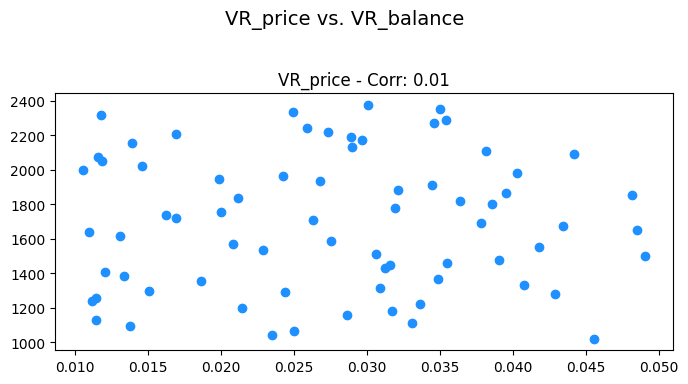

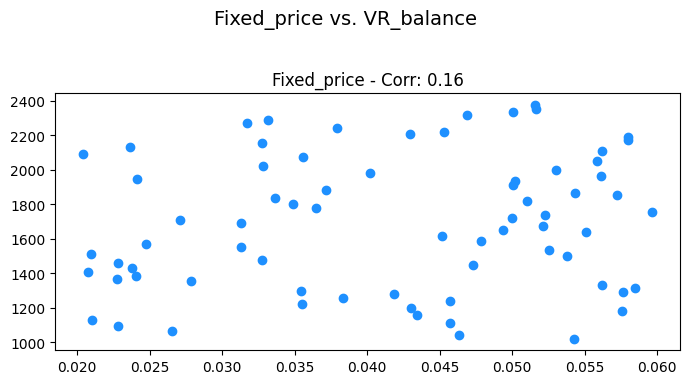

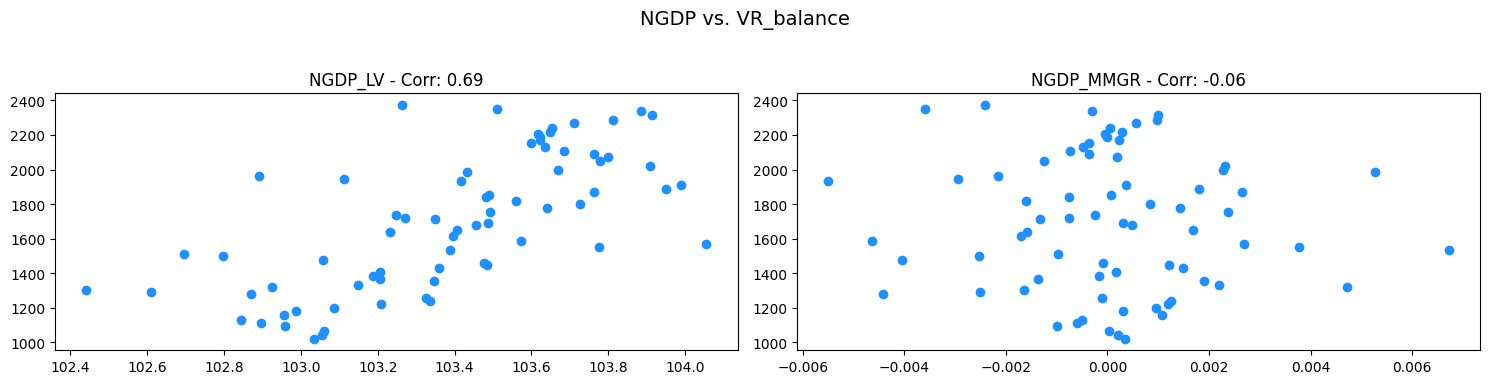

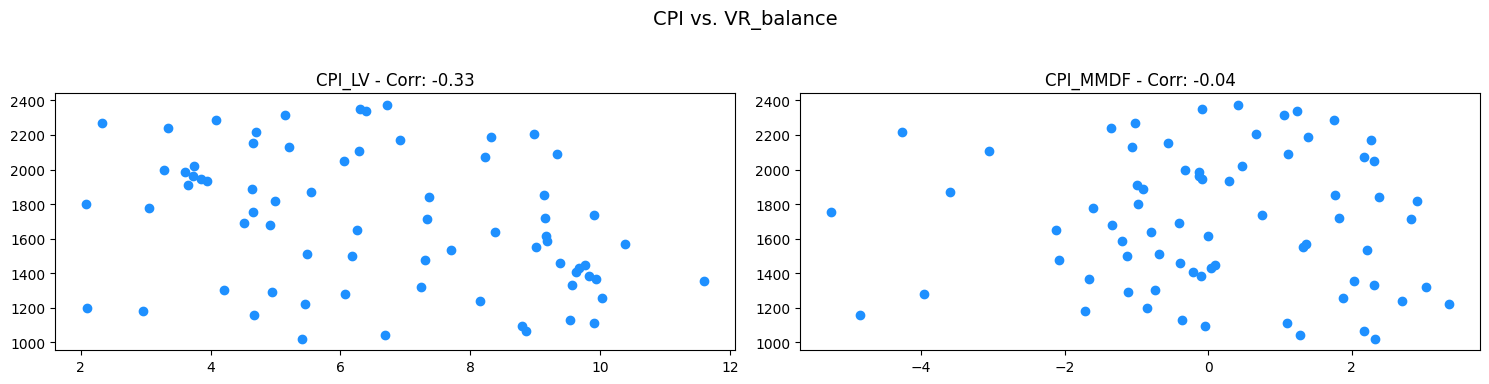

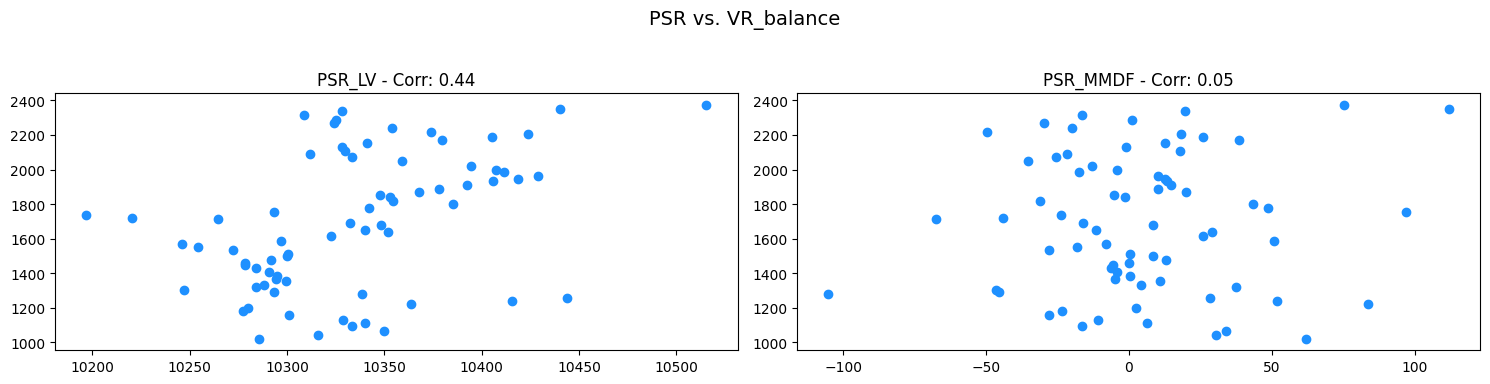

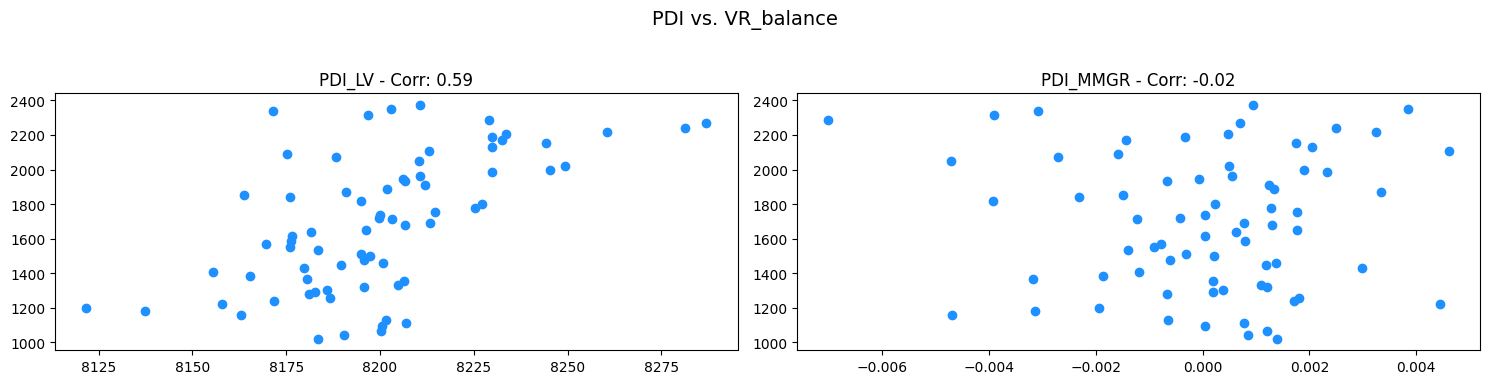

/Users/kexinz8/Project_LEGO/Technic/data.py:985: UserWarning: No type mapping for variables: ['VR_price', 'Fixed_price'], using raw-only
  warnings.warn(


,variable,corr,abs_corr
0,NGDP_LV_L2,0.730744,0.730744
1,NGDP_LV_L3,0.724288,0.724288
2,NGDP_LV_L1,0.718385,0.718385
3,NGDP_LV,0.686513,0.686513
4,PDI_LV_L3,0.668542,0.668542
...,...,...,...
109,NGDP_MMGR2_L1,-0.004796,0.004796
110,CPI_MMDF6_L3,0.002739,0.002739
111,CPI_MMDF3_L3,0.002389,0.002389
112,NGDP_MMGR6_L1,-0.001782,0.001782


In [26]:
# Explore Vars
vars_list = ['VR_price', 'Fixed_price', 'NGDP', 'CPI', 'PSR', 'PDI']
seg1.explore_vars(vars_list, plot_type='scatter')

In [25]:
forced_in = [tc.DumVar('M')]
desired_pool = ['PDI', 'PSR', 'NGDP']#, 'UNRATE', 'CPI']
seg1.search_cms(desired_pool=desired_pool, forced_in=None)

=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : ['PDI', 'PSR', 'NGDP']
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Category limit  : 1
Exp sign map    : None
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: None
Outlier idx     : None


Built 4912 spec combinations.


--- Active Tests of Filtering ---                                                                                       
- Coefficient Significance: filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- In-Sample R²: filter_mode: moderate | desc: Require R² ≥ 0.3.
- Multicollinearity: filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity: filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Sign Check: filter_mode: moderate | desc: All coefficients must have expected signs.
- Y–X Cointegration: filter_mode: moderate | desc: At lea

KeyboardInterrupt: 

In [34]:
# seg1.show_report(show_params=True, show_tests=True)

In [35]:
# seg1.cms['cm2'].show_report()

In [26]:
# CM1
indep_vars = ['NGDP']
seg1.build_cm('cm1', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP

In [27]:
# CM2
m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP']
seg1.build_cm('cm2', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12

In [28]:
from Technic import GR2
# CM3
m_dum = tc.DumVar('M', categories=[2,3,4,5,6,7])
tsfm_var = [TSFM('PSR', 'GR2')]

indep_vars = [m_dum, 'NGDP', tsfm_var]
seg1.build_cm('cm3', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2

In [29]:
# seg1.cms['cm3'].model_in.testset.tests[3].test_result

In [30]:
# from TECHNIC import GR2
# # CM4
# m_dum = tc.DumVar('M', mode='group', categories=[(2,3,4),5,6,7])
# tsfm_var = [TSFM('PSR', 'GR2')]

# indep_vars = [m_dum, 'NGDP', tsfm_var]
# seg1.build_cm('cm4', indep_vars)

=== Candidate Models to Report ===
- cm1: OLS-HAC(3):VR_balance~C+NGDP
- cm2: OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2


=== In-Sample Performance ===
         R²  Adj R²      ME     MAE    RMSE
Model                                      
cm1   0.450   0.441 647.468 197.647 239.133
cm2   0.580   0.473 616.598 161.315 208.959
cm3   0.590   0.526 530.222 166.787 206.496

=== Out-of-Sample Performance ===
            ME     MAE    RMSE
Model                         
cm1    829.992 483.031 500.291
cm2    965.202 391.759 467.085
cm3   1056.076 434.624 503.216

=== Performance Plot ===


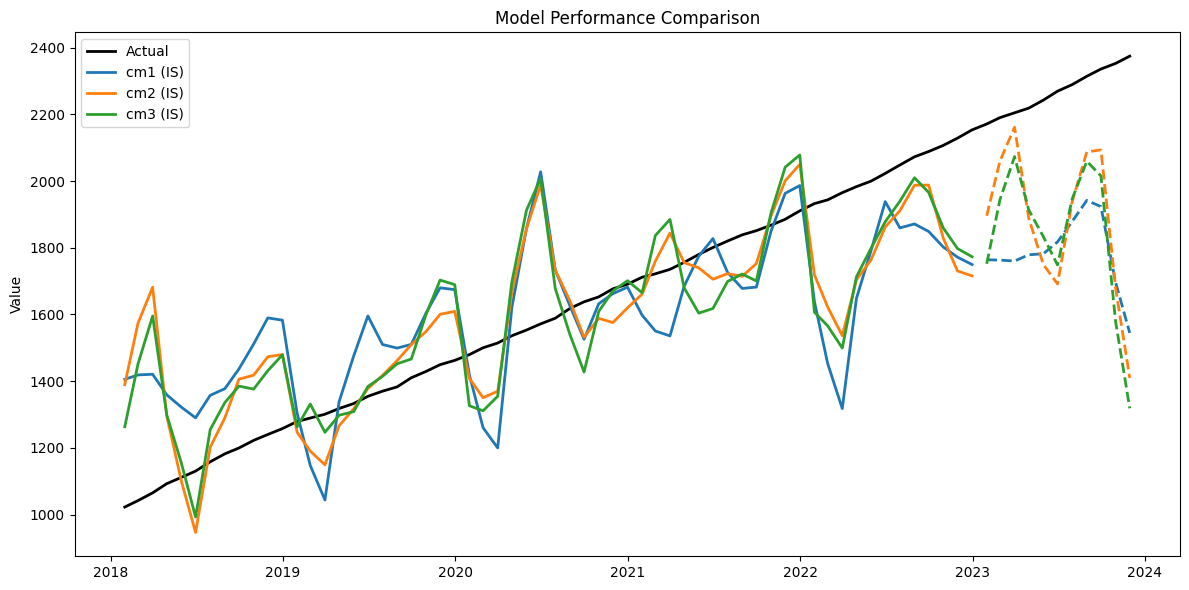


=== Model: cm1 — Parameters ===
  Variable          Coef    Pvalue           VIF           Std
0    const -61394.663682  0.000066  84789.079304  14270.392327
1     NGDP    609.506644  0.000045      1.000000    138.036167

=== Model: cm2 — Parameters ===
   Variable          Coef        Pvalue            VIF           Std
0     const -87319.408208  1.829566e-09  141474.635689  11752.863960
1      NGDP    860.963932  1.200773e-09       1.674501    114.020610
2       M:2    165.744736  8.342265e-02       1.864746     93.706565
3       M:3    270.675067  7.657437e-02       1.911978    149.482425
4       M:4    -28.270126  7.789950e-01       1.842218    100.161699
5       M:5   -171.673432  1.203265e-01       1.913674    108.507726
6       M:6   -280.135215  2.583671e-02       2.022113    121.712879
7       M:7   -119.808938  2.278563e-01       1.906979     98.055144
8       M:8    -60.040494  5.521978e-01       1.884852    100.272142
9       M:9    -27.759566  8.042562e-01       1.877870 

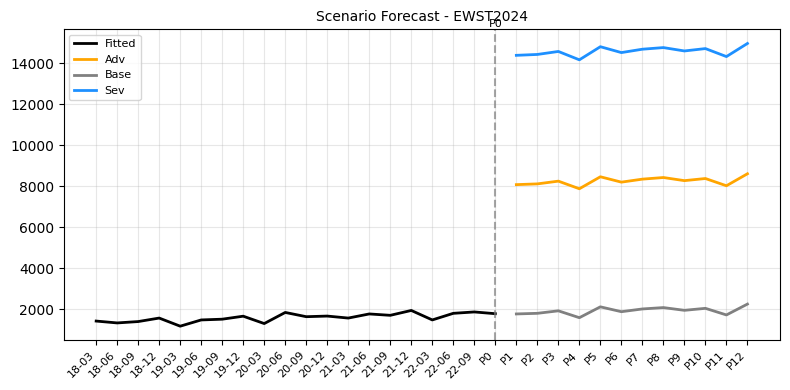

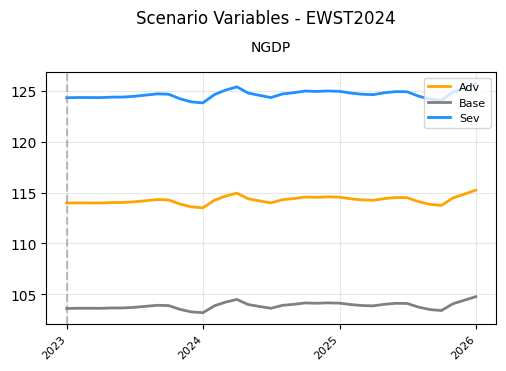


=== Model: cm2 — Scenario Analysis ===
Scenario plots for EWST2024 generated successfully.


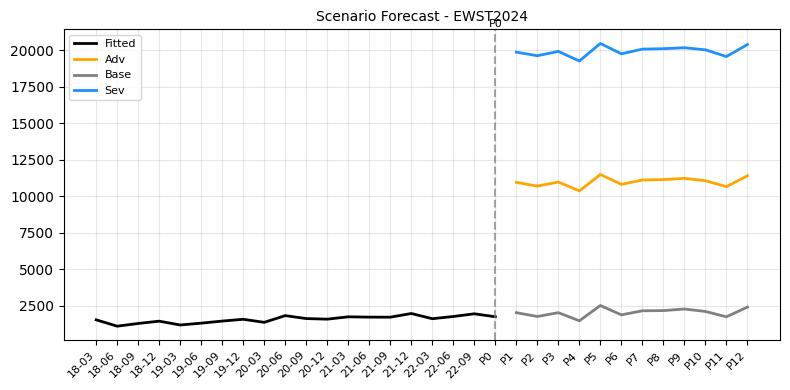

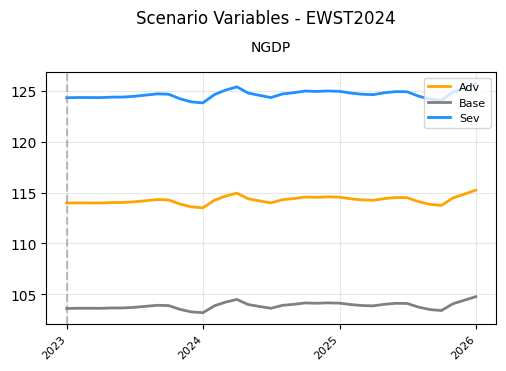


=== Model: cm3 — Scenario Analysis ===
Scenario plots for EWST2024 generated successfully.


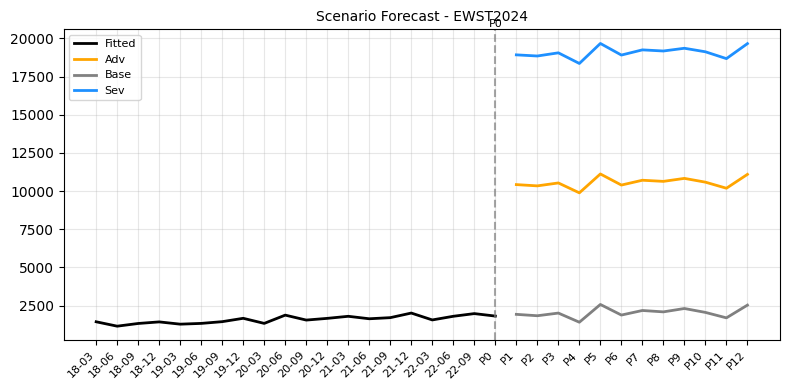

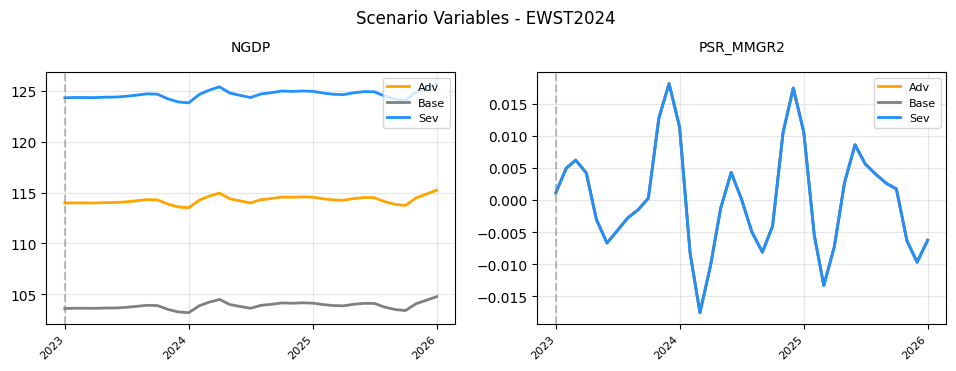

In [31]:
seg1.show_report(show_params=True, show_tests=True, show_scens=True)

In [32]:
vr_95 = seg1.dm.internal_data['VR_balance'].quantile(0.90)
vr_95

2218.766721015874

In [33]:
from Technic import CondVar, BO
#cm4 with CondVars
mth_var = [tc.DumVar('M', categories=[2,3,4,5,6,7])]
tsfm_var = [TSFM('PSR', GR2)]
cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

indep_vars = [mth_var, 'NGDP', tsfm_var, cond_var]
seg1.build_cm('cm4', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2+VR_price_BO

In [34]:
(seg1.cms['cm4'].model_full.y > vr_95).loc[lambda x: x==1]

Date
2023-05-31    True
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, Name: VR_balance, dtype: bool

In [35]:
tf = (seg1.cms['cm4'].model_full.X.VR_price_BO - seg1.dm.internal_data.VR_price) != 0
tf.loc[lambda x: x==1]

Date
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, dtype: bool

In [36]:
cm = seg1.cms['cm4']
cm.model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Coefficient Significance', 'Residual Stationarity', 'Y–X Cointegration'])

In [37]:
cm.model_in.testset.print_test_info()

Active Tests:
- In-Sample R² | filter_mode: moderate | desc: Require R² ≥ 0.3.
- Coefficient Significance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity | filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Y–X Cointegration | filter_mode: moderate | desc: At least half of tests must show X variables are non-stationary and residuals are stationary.
- Sign Check | filter_mode: moderate | desc: All coefficients must have expected signs.

Inactive Tests:
- Fit Measures
- IS Error Measures
- OOS Error Measures
- Residual Normality
- Residual Autocorrelation
- Residual Heteroscedasticity
- Y Stationarity

Note: These tests are included but not turned on. Set `filter_on=True` on a test to include it in filter_pass results.


### Test

In [49]:
seg1.cms['cm4'].model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Common Driver Significance',
  "Group Driver F-Test M:2'3'4'5'6'7",
  'Residual Stationarity'])

# Test Export

In [38]:
seg1.export(model_ids=['cm1','cm3','cm4'], content=['test_results'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 3
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: test_results

Preparing export...

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


In [41]:
seg1.export(model_ids=['cm3'], content=['timeseries_data', 'staticStats'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 1
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: staticStats, timeseries_data

Preparing export...

Successfully exported model statistics to /Users/kexinz8/Project_LEGO/staticStats.csv

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


In [42]:
seg1.export(model_ids=['cm1'], content=['timeseries_data', 'staticStats'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 1
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: staticStats, timeseries_data

Preparing export...

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


## Search

In [50]:
mdlsrch_config = {
    'dm': dm,
    'target': 'VR_balance',
    'model_cls': tc.OLS
}

srch = tc.ModelSearch(**mdlsrch_config)

In [51]:
dm.model_mev.head()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal,M,Q
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,NaN,NaN,3,1
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,NaN,NaN,4,2
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,NaN,NaN,5,2
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,NaN,NaN,6,2
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,NaN,NaN,7,3


In [52]:
forced_in = [tc.DumVar('M', categories=[2,3,4])]
desired_pool = [('PDI', 'PSR'), ['NGDP', tc.DumVar('M', categories=[2,3,4])], {'UNRATE', 'CPI', 'VR_price',}]

srch.build_spec_combos(forced_in=None, desired_pool=desired_pool, max_var_num=4, max_lag=2, max_periods=2)
srch.all_specs

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


[[('PDI', 'PSR')],
 [['NGDP', DumVar:M:2'3'4]],
 [TSFM:CPI_LV],
 [TSFM:CPI_LV_L1],
 [TSFM:CPI_LV_L2],
 [TSFM:CPI_DF],
 [TSFM:CPI_DF_L1],
 [TSFM:CPI_DF_L2],
 [TSFM:CPI_DF2],
 [TSFM:CPI_DF2_L1],
 [TSFM:CPI_DF2_L2],
 [TSFM:CPI_GR],
 [TSFM:CPI_GR_L1],
 [TSFM:CPI_GR_L2],
 [TSFM:CPI_GR2],
 [TSFM:CPI_GR2_L1],
 [TSFM:CPI_GR2_L2],
 [TSFM:UNRATE_LV],
 [TSFM:UNRATE_LV_L1],
 [TSFM:UNRATE_LV_L2],
 [TSFM:UNRATE_DF],
 [TSFM:UNRATE_DF_L1],
 [TSFM:UNRATE_DF_L2],
 [TSFM:UNRATE_DF2],
 [TSFM:UNRATE_DF2_L1],
 [TSFM:UNRATE_DF2_L2],
 [TSFM:UNRATE_GR],
 [TSFM:UNRATE_GR_L1],
 [TSFM:UNRATE_GR_L2],
 [TSFM:UNRATE_GR2],
 [TSFM:UNRATE_GR2_L1],
 [TSFM:UNRATE_GR2_L2],
 ['VR_price'],
 [('PDI', 'PSR'), ['NGDP', DumVar:M:2'3'4]],
 [('PDI', 'PSR'), TSFM:CPI_LV],
 [('PDI', 'PSR'), TSFM:CPI_LV_L1],
 [('PDI', 'PSR'), TSFM:CPI_LV_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF],
 [('PDI', 'PSR'), TSFM:CPI_DF_L1],
 [('PDI', 'PSR'), TSFM:CPI_DF_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF2],
 [('PDI', 'PSR'), TSFM:CPI_DF2_L1],
 [('PDI', 'PSR'), TSFM

In [53]:
passed_cms, failed_info, error_log = srch.filter_specs()

Filtering Specs: 100%|██████████| 127/127 [00:10<00:00, 11.94it/s, estimated_finish=2025-06-15 17:08:31]


In [54]:
error_log

[]

In [55]:
failed_info

[([('PDI', 'PSR')], ['In-Sample R²']),
 ([['NGDP', DumVar:M:2'3'4]], ['Residual Stationarity']),
 ([TSFM:CPI_LV], ['In-Sample R²']),
 ([TSFM:CPI_LV_L1], ['In-Sample R²']),
 ([TSFM:CPI_LV_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF], ['In-Sample R²']),
 ([TSFM:CPI_DF_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF2], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR], ['In-Sample R²']),
 ([TSFM:CPI_GR_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR2], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_LV], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2_L1], ['In-Sample R²'])

In [56]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

passed_cms, failed_info, error_log = srch.filter_specs(test_update_func=test_update_func)

Filtering Specs: 100%|██████████| 127/127 [00:09<00:00, 13.13it/s, estimated_finish=2025-06-15 17:08:41]


In [57]:
passed_cms

[OLS:VR_balance~C+NGDP+M:2+M:3+M:4,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_LV_L2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_GR]

In [58]:
error_log

[]

In [59]:
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))


def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

seg1.cms['cm3'].model_in.load_testset(test_update_func=test_update_func)
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))

(False, ["Group Driver F-Test M:2'3'4'5'6'7", 'Residual Stationarity'])
(False, ["Group Driver F-Test M:2'3'4'5'6'7"])


In [60]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False},
    'In-Sample R²': {'thresholds':{'strict': 0.8, 'moderate': 0.7}}
    }

    return update_map


forced_in = []
desired_pool = [['PDI', 'PSR'], 'NGDP', {'UNRATE', 'CPI'}, 'VR_price', tc.DumVar('M', categories=[2,3,4])]
seg1.search_cms(desired_pool=desired_pool, forced_in=forced_in, test_update_func=test_update_func, outlier_idx=["2018-04-30", "2018-05-31"])

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : [['PDI', 'PSR'], 'NGDP', {'CPI', 'UNRATE'}, 'VR_price', DumVar:M:2'3'4]
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: <function test_update_func at 0x000001DC47D4F3A0>

Built 7751 spec combinations.

--- Example TestSet Info ---
Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.7.
- Common Driver Significance | category: performance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Require Engle–Granger p-value < 0.10

Ina

Filtering Specs:   0%|          | 8/7751 [00:00<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

KeyboardInterrupt: 

Filtering Specs:   0%|          | 9/7751 [00:20<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

In [63]:
seg1.searcher.analyze_failures()


=== Failed Spec Combinations Analysis ===
Total failed spec combos: 7742

1) Failure counts by test:
                 Test Name  Failure Count
              In-Sample R²           6749
Common Driver Significance            955
         Y–X Cointegration             35
        Residual Normality              3


2) Top 5 most frequent failed tests and their common spec elements:

  Test: In-Sample R²
    Number of combos that failed this test: 6749
    Top 3 spec elements contributing to this failure:
      • VR_price  (appeared in 3375 combos)
      • DumVar:M:2'3'4  (appeared in 3330 combos)
      • ['PDI', 'PSR']  (appeared in 2964 combos)

  Test: Common Driver Significance
    Number of combos that failed this test: 955
    Top 3 spec elements contributing to this failure:
      • ['PDI', 'PSR']  (appeared in 902 combos)
      • VR_price  (appeared in 500 combos)
      • DumVar:M:2'3'4  (appeared in 499 combos)

  Test: Y–X Cointegration
    Number of combos that failed this test:

=== Candidate Models to Report ===
- cm1: OLS:VR_balance~C+NGDP
- cm2: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2
- cm4: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2+VR_price_BO
- cm1_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV_L1+UNRATE_LV_L2+M:2+M:3+M:4
- cm2_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV+M:2+M:3+M:4
- cm3_2: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L3+M:2+M:3+M:4
- cm4_2: OLS:VR_balance~C+NGDP_LV+UNRATE_DF2_L3+M:2+M:3+M:4
- cm5: OLS:VR_balance~C+NGDP_LV+UNRATE_GR_L3+M:2+M:3+M:4
- cm6: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L3+M:2+M:3+M:4
- cm7: OLS:VR_balance~C+NGDP_LV+UNRATE_GR3_L2+M:2+M:3+M:4
- cm8: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L2+M:2+M:3+M:4
- cm9: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L2+M:2+M:3+M:4


=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.585757  0.578615  522.291195

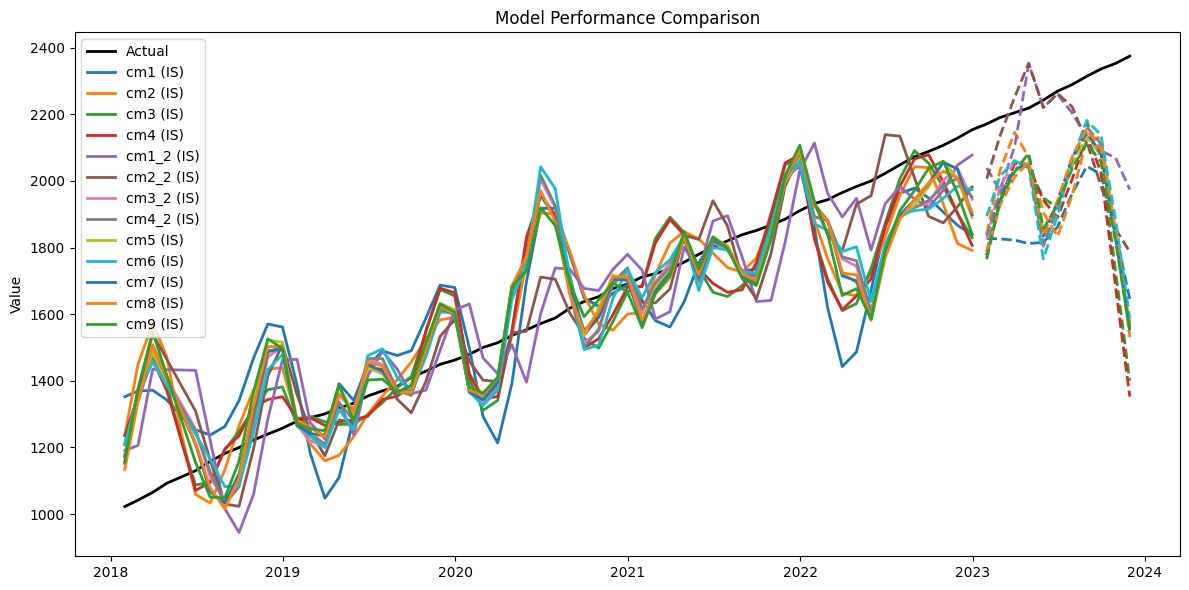


=== Model: cm1 — Testing Metrics ===

--- Fit Measures ---
R²        0.585757
Adj R²    0.578615

--- IS Error Measures ---
ME      522.291195
MAE     169.955421
RMSE    207.529157

--- OOS Error Measures ---
ME      728.482837
MAE     407.558730
RMSE    424.405214

--- In-Sample R² ---
R²    0.585757

--- Common Driver Significance ---
           P-value  Passed
NGDP  6.693432e-08    True

--- Multicollinearity ---
          VIF
Variable     
NGDP      1.0

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -0.595801  0.871928   False
PP     -1.757428  0.401793   False
KPSS    0.842360  0.010000   False
ZA           NaN       NaN   False
DFGLS   0.953764  0.918276   False
RUR     1.678293  0.900000    True

--- Residual Normality ---
      Statistic   P-value  Passed
Test                             
JB     1.181627  0.553877    True
SW     0.975336  0.263710    True
KS     0.080475  0.802298    True
CM     0.031041  0.973589   

In [64]:
seg1.show_report(show_tests=True)

In [65]:
seg1.searcher.top_cms[0].testset_in.tests[3].thresholds

{'strict': 0.8, 'moderate': 0.7}

### Scenario

In [66]:
# # Create a Scenario object
# mth_var = [f'M{i}' for i in range(2,5)]
# tsfm_var = [TSFM('PSR', 'GR2')]
# cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

# scen_config = {
#     'dm': dm,
#     'model': cm.model_in,
#     'specs': [mth_var, 'NGDP', tsfm_var, cond_var],
#     'P0': '2023-08-31'
# }
# scen = tc.Scenario(**scen_config)
# y_scens = scen.y_scens

In [67]:
# y_scens['fake_scens']['base'].dropna()

In [68]:
# y_scens['fake_scens']['adv'].dropna()